In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
plt.rcParams['figure.figsize'] = [5, 5]
from tqdm import tqdm

# Homoscedastic sigma

In [2]:
N = 10
s = 0.2
dist_init = norm(1, s)

In [3]:
fake_m = dist_init.rvs(N) #fake measurement as estimate of the true distribution

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3552\1755650198.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


Text(0, 0.5, '$p(x_i|\\mu,\\sigma)$')

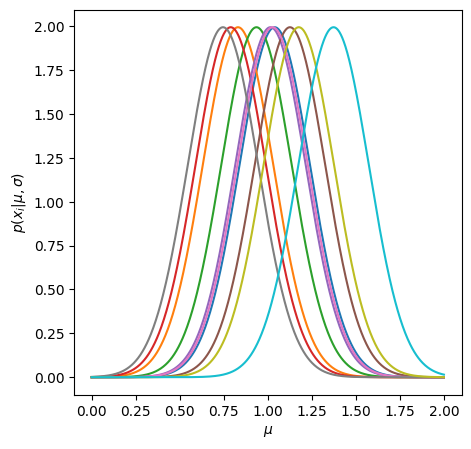

In [4]:
x_grid = np.linspace(0,2,1000)
Ls = np.array([norm.pdf(x_grid,loc=fake_m[i],scale=s) for i in range(N)]) # probability of each data point

for L in Ls:
    plt.plot(x_grid, L)

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3552\4056138146.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


1.005005005005005 1.005868279724316


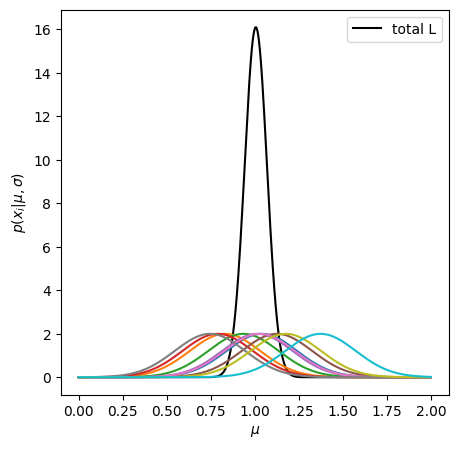

In [5]:
L_tot = np.prod(Ls, axis = 0)
plt.plot(x_grid, L_tot, 'black', label = 'total L')

for L in Ls:
    plt.plot(x_grid, L)

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()

ML = x_grid[np.argsort(L_tot)[-1]]
MLE = np.mean(fake_m)

print(ML, MLE) #comparing Maximum Likelihood and ML Estimator

In [6]:
L_diff = np.diff(np.log(L_tot), 2)
L_diff_norm = -1 * (L_diff/(x_grid[1]-x_grid[0])**2)
err = (1/np.sqrt(L_diff_norm))[np.argsort(L_tot)[-1]]
print(err, s/np.sqrt(N)) #comparing the Fisher matrix with the error estimator

0.06324555320337504 0.06324555320336758


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3552\29164382.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


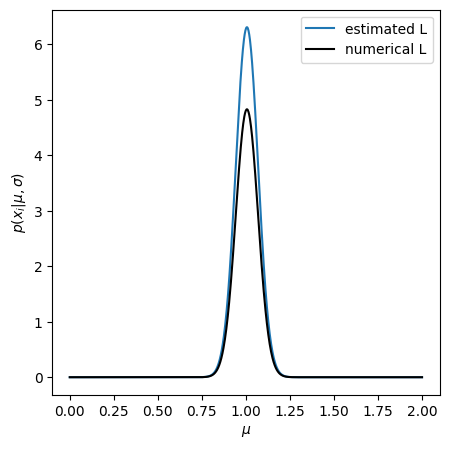

In [7]:
plt.plot(x_grid, norm.pdf(x_grid, MLE, s/np.sqrt(N)), label = 'estimated L')
plt.plot(x_grid, 0.3*L_tot, 'black', label = 'numerical L')
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()

# Heteroscedastic sigma

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3552\2279073644.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


Text(0, 0.5, '$p(x_i|\\mu,\\sigma)$')

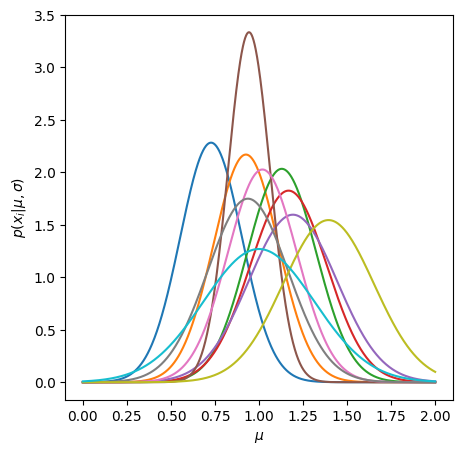

In [8]:
N = 10
sigma = norm(0.2, 0.05).rvs(N) 
fake_m = np.array([norm(1, s).rvs(1) for s in sigma])
Ls = np.array([norm.pdf(x_grid,loc=fake_m[i],scale=sigma[i]) for i in range(N)])

for L in Ls:
    plt.plot(x_grid, L)

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3552\4096801043.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


1.001001001001001 [1.00012142]


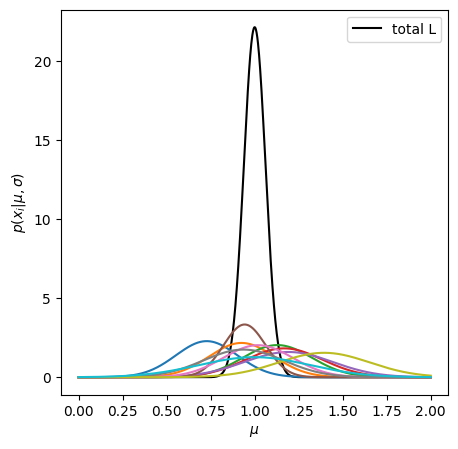

In [9]:
L_tot = np.prod(Ls, axis = 0)
plt.plot(x_grid, L_tot, 'black', label = 'total L')

for L in Ls:
    plt.plot(x_grid, L)

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()

ML = x_grid[np.argsort(L_tot)[-1]]
MLE =np.average(fake_m, axis = 0, weights=1/sigma**2)

print(ML, MLE)

In [10]:
L_diff = np.diff(np.log(L_tot), 2)
L_diff_norm = -1 * (L_diff/(x_grid[1]-x_grid[0])**2)
err = (1/np.sqrt(L_diff_norm))[np.argsort(L_tot)[-1]]
print(err, (np.sum(1/(sigma**2)))**(-1/2))

0.06141167401207155 0.061411674012072266


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_3552\1462117595.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu$')


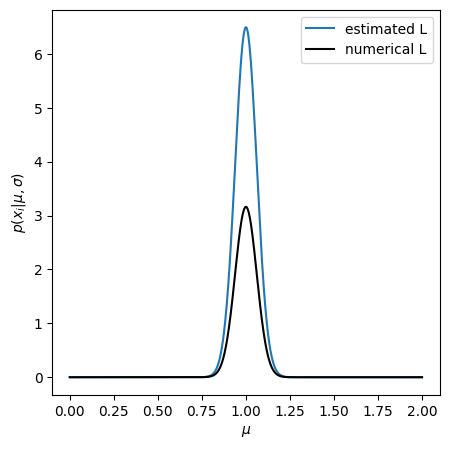

In [11]:
plt.plot(x_grid, norm.pdf(x_grid, MLE, (np.sum(1/(sigma**2)))**(-1/2)), label = 'estimated L')
plt.plot(x_grid, (1/7)*L_tot, 'black', label = 'numerical L')
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()